In [1]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np

import scipy.special as sp
from scipy import integrate

from sklearn import metrics

from scipy.stats import multivariate_normal

from scipy.stats import shapiro
from scipy.stats import anderson

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.mixture import BayesianGaussianMixture

from sklearn import naive_bayes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict


from sklearn.linear_model import LogisticRegression


In [2]:
def asy1(estimator, X, y):
    Penalty_1 = np.array([[-10,10], [1,0]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_1[y, answ])
    
def asy2(estimator, X, y):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_2[y, answ])

def num(estimator, X, y):
    answ = np.int64(estimator.predict(X))
    return np.sum(np.abs(answ - y) > 0)

def _num(y1, y2):
    return np.sum(np.abs(y1 - y2) > 0)

def _acc(y1, y2):
    return np.sum(y1 == y2)

def _asy1(y1, y2):
    Penalty_1 = np.array([[-10,10], [1,0]])
    return np.sum(Penalty_1[y1, y2])

def _asy2(y1, y2):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    return np.sum(Penalty_2[y1, y2])




In [3]:
np.random.seed(0)

In [4]:
X_train_load = pd.read_csv('./data/task1_14_learn_X.csv',header=None, sep=' ').as_matrix()
y_train_load = np.reshape(np.int64(pd.read_csv('./data/task1_14_learn_y.csv',header=None, sep=' ').as_matrix()), -1)

X_test_load = pd.read_csv('./data/task1_14_test_X.csv',header=None, sep=' ').as_matrix()

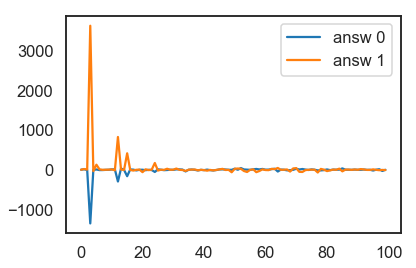

In [5]:
plt.plot(np.mean(X_train_load[np.where(y_train_load==0)], axis = 0), label = 'answ 0')
plt.plot(np.mean(X_train_load[np.where(y_train_load==1)], axis = 0), label = 'answ 1')

plt.legend(loc='best')
plt.savefig('Practise_14_FeatureMean.pdf')

In [6]:
print(X_train_load.shape)
print(y_train_load.shape)
print(X_test_load.shape)


(300000, 100)
(300000,)
(10000, 100)


In [7]:
skb = SelectKBest(f_classif, k=1)
# skb = SelectKBest(mutual_info_classif, k=1)
# skb = SelectKBest(chi2, k=1)
skb.fit(X_train_load, y_train_load)


SelectKBest(k=1, score_func=<function f_classif at 0x1141f5378>)

In [8]:
np.sort(skb.scores_)[::-1][:6]

array([  9.41873410e+04,   9.87303527e+03,   1.34745049e+03,
         1.61694139e+02,   3.38903110e+01,   1.24013137e+01])

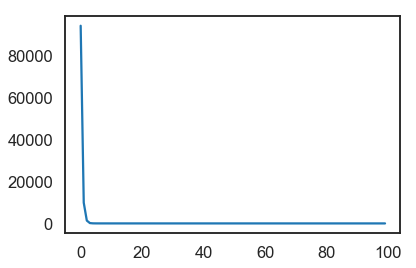

In [9]:
plt.plot(np.sort(skb.scores_)[::-1])

In [10]:
skb.k = 3

In [11]:
# X = skb.transform(scale(np.vstack([X_train_load, X_test_load])))
X = skb.transform(np.vstack([X_train_load, X_test_load]))
# X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train = X[:X_train_load.shape[0]]
X_test = X[X_train_load.shape[0]:]

y_train = np.array(y_train_load)



In [12]:
pd.DataFrame(X_train[np.where(y_train==0)]).describe()

,0,1,2
count,219109.000000,219109.000000,219109.000000
mean,-1354.720771,-297.732502,-163.249704
std,4012.079195,2754.790691,3821.741740
min,-21318.078463,-12235.518785,-16870.243463
25%,-4001.048182,-2152.662620,-2745.091198
50%,-1264.296222,-290.156475,-162.738202
75%,1385.329248,1561.538745,2428.527283
max,15383.534565,11636.835193,17506.857692


In [13]:
pd.DataFrame(X_train[np.where(y_train==1)]).describe()

,0,1,2
count,80891.000000,80891.000000,80891.000000
mean,3633.348302,826.272887,414.421837
std,3778.792948,2735.327879,3834.225917
min,-14518.831112,-11193.855817,-16000.049104
25%,1118.420145,-1023.218885,-2168.965663
50%,3657.562775,828.648901,398.427552
75%,6160.879859,2667.873114,2999.256025
max,19689.016542,11934.247056,16765.827507


In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(300000, 3)
(300000,)
(10000, 3)


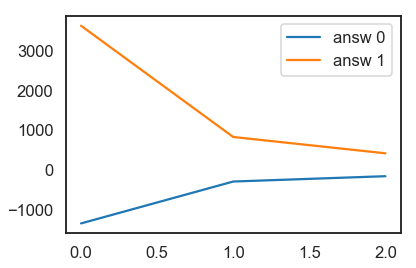

In [15]:
plt.plot(np.mean(X_train[np.where(y_train==0)], axis = 0), label = 'answ 0')
plt.plot(np.mean(X_train[np.where(y_train==1)], axis = 0), label = 'answ 1')

plt.legend(loc='best')

plt.savefig('Practise_14_FeatureMean.pdf')

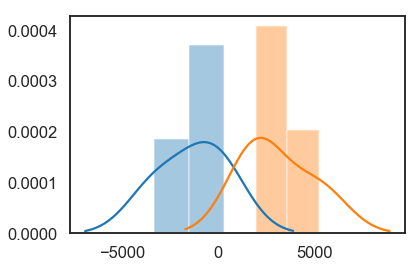

In [16]:
sns.distplot(X_train[np.where(y_train==0)][0], label = 'answ 0')
sns.distplot(X_train[np.where(y_train==1)][0], label = 'answ 1')

plt.savefig('Practise_14_Feature1.pdf')

In [17]:
print(_asy1(y_train, y_train), _asy2(y_train, y_train))
print(np.sum(y_train))

-2191090 -300000
80891


In [18]:
# for i in range(X_train.shape[1]):
#     print(anderson(X_train[np.where(y_train==1)][:,i])[0], anderson(X_train[np.where(y_train==0)][:,i])[0])
    

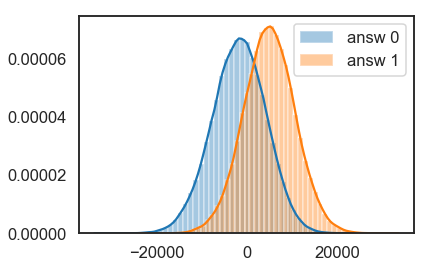

In [19]:
sns.distplot(np.sum(X_train[np.where(y_train==0)]**1, axis = 1), label = 'answ 0')
sns.distplot(np.sum(X_train[np.where(y_train==1)]**1, axis = 1), label = 'answ 1')

plt.legend(loc='best')
plt.savefig('Practise_14_Statistic.pdf')

In [20]:
X_train_new = np.reshape(np.sum(X_train, axis = 1), [-1,1])
X_test_new = np.reshape(np.sum(X_test, axis = 1), [-1,1])
y_train_new = np.array(y_train)

# X_train_new = np.reshape(np.hstack([X_train[:,0], np.sum(X_train, axis = 1)]), [-1,2])
# X_test_new = np.reshape(np.hstack([X_test[:,0], np.sum(X_test, axis = 1)]), [-1,2])
# y_train_new = np.array(y_train)

In [21]:
rho = 0.5
Predict = cross_val_predict(estimator=LogisticRegression(penalty = 'l1'), X=X_train, y=y_train, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train, Predict[:,1]))
print('NUM', _num(y_train, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train, np.int64(Predict[:,1]>rho)))

Predict_For_AUC = LogisticRegression(penalty = 'l1').fit(X_train, y_train).predict(X_test)
Predict_For_NUM = LogisticRegression(penalty = 'l1').fit(X_train, y_train).predict(X_test)





ACC 0.80639
AUC 0.842065289851
NUM 58083
ASY1 -1796498
ASY2 -166123


In [22]:
rho = 0.9
Predict = cross_val_predict(estimator=LogisticRegression(penalty = 'l1'), X=X_train, y=y_train, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train, Predict[:,1]))
print('NUM', _num(y_train, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train, np.int64(Predict[:,1]>rho)))

Predict_For_ASY1 = LogisticRegression(penalty = 'l1').fit(X_train, y_train).predict(X_test)







ACC 0.74439
AUC 0.842065226321
NUM 76683
ASY1 -2108992
ASY2 -146349


In [23]:
rho = 0.6
Predict = cross_val_predict(estimator=LogisticRegression(penalty = 'l1'), X=X_train, y=y_train, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train, Predict[:,1]))
print('NUM', _num(y_train, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train, np.int64(Predict[:,1]>rho)))

Predict_For_ASY2 = LogisticRegression(penalty = 'l1').fit(X_train, y_train).predict(X_test)




ACC 0.800983333333
AUC 0.842065177574
NUM 59705
ASY1 -1945033
ASY2 -170782


In [24]:
pd.DataFrame(np.vstack([Predict_For_AUC, Predict_For_NUM, Predict_For_ASY1, Predict_For_ASY2]).T).to_csv('task1_14_answ.csv', sep = ',')
